In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 샘플 데이터 만들기

X = np.array([[1, 1],
              [1, 2],
              [2, 2],
              [2, 3]])
y = np.array([0, 0, 1, 1])

# x1, x2 데이터를 보고 y 정답 레이블: 0/1을 분류하는 문제를 풀겠다는 것

In [7]:
# bias항 추가 x0=1

X_bias = np.c_[np.ones((X.shape[0], 1)), X]

In [23]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 입력값 z가 크면 확률 1에 가깝게, 작으면 0에 가깝게 매핑
#sigmoid 함수: 확률로 바꾸는 과정

In [25]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # log(0) 방지
    return - (1/m) * np.sum(y*np.log(h+epsilon) + (1-y)*np.log(1-h+epsilon))

# Cost 값이 작아질수록 모델이 잘 학습된 상태
# 성능 평가

In [47]:
#Gradient Descent 알고리즘

iterations = 1000  #iteration: 몇번 반복해서 학습할건지?
alpha = 0.1
theta = np.zeros(X_bias.shape[1])

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

#경사하강법 업데이트
    for i in range(iterations):
        # 예측값 h(x) = sigmoid(X @ theta)
        h = sigmoid(X @ theta)  

        # 그래디언트(기울기) 계산
        gradient = (1/m) * X.T @ (h - y)

        # 파라미터 업데이트 (경사 하강법 핵심!)
        theta -= alpha * gradient  #alpha: 학습 속도 조절

        # 현재 비용(cost) 계산
        cost = compute_cost(X, y, theta)

        # 비용 저장
        cost_history.append(cost)

    return theta, cost_history

# theta: 파라미터 초기값 / alpha: 학습률 / cost_history: 반복하면서 cost 저장

### 시각화

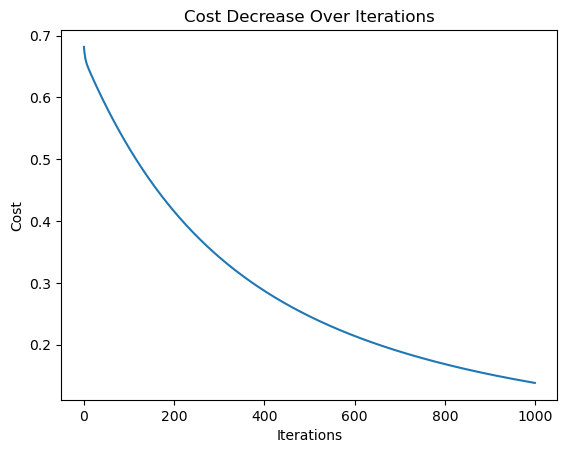

In [50]:
theta_final, cost_history = gradient_descent(X_bias, y, theta, alpha, iterations)

plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Decrease Over Iterations')
plt.show()

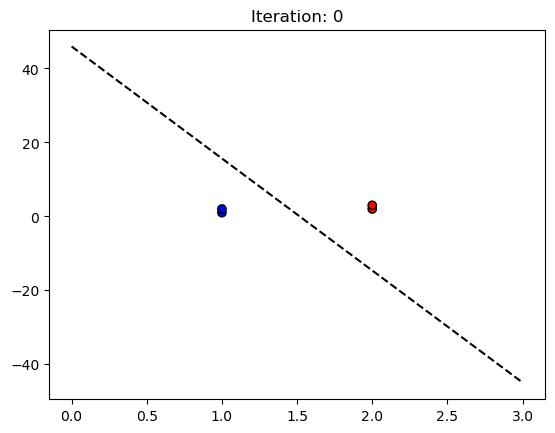

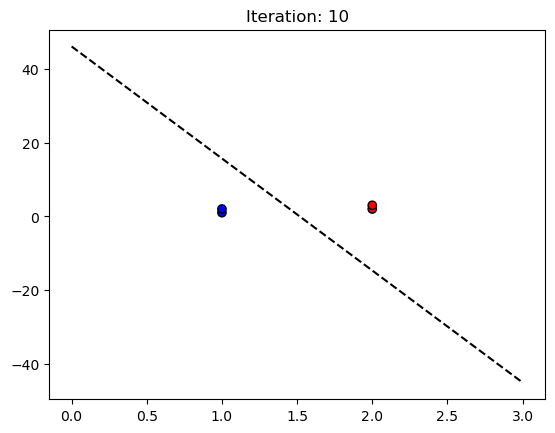

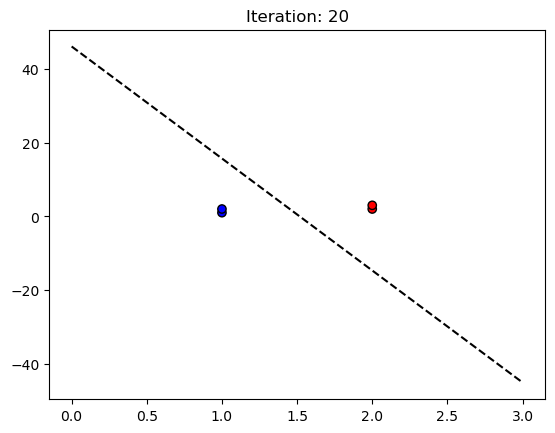

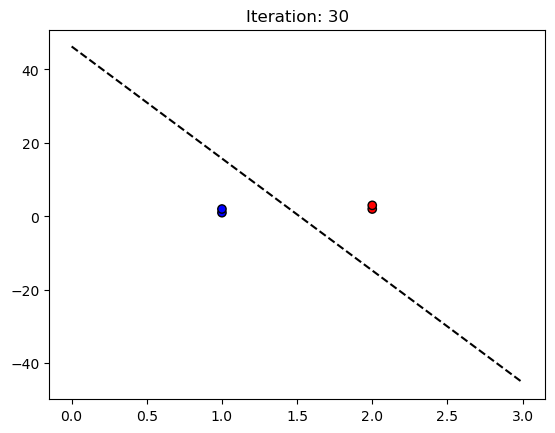

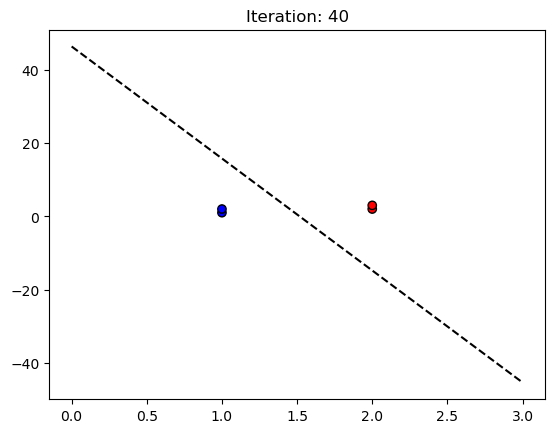

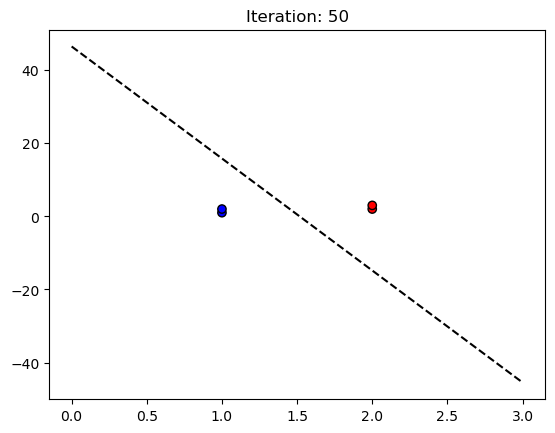

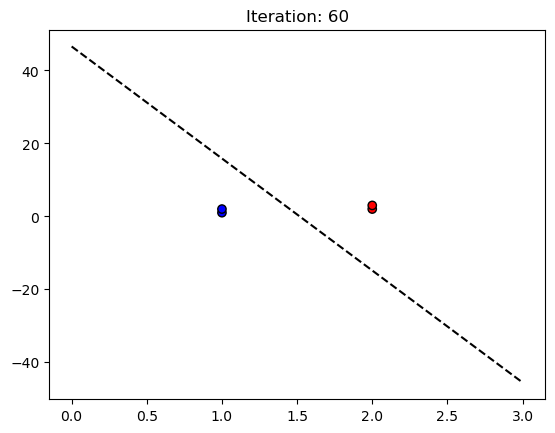

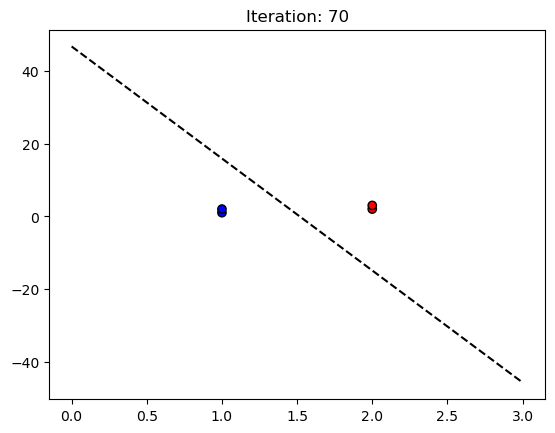

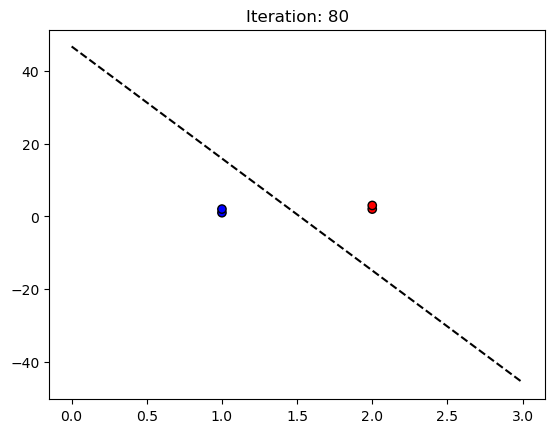

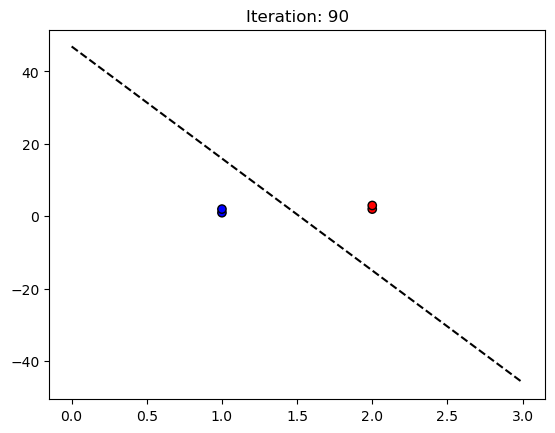

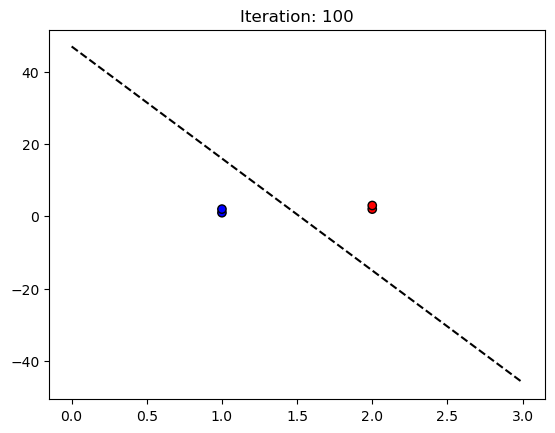

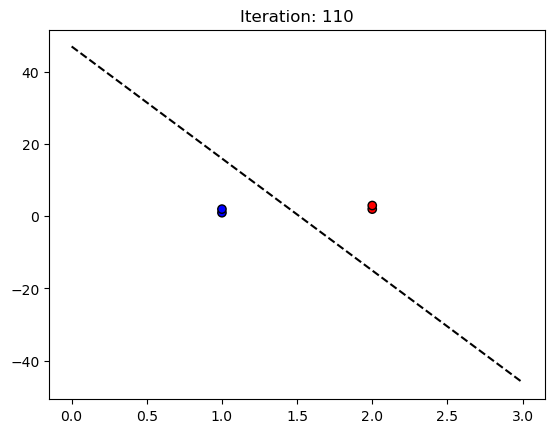

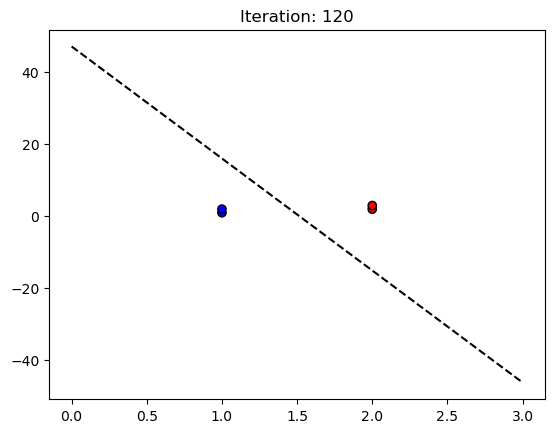

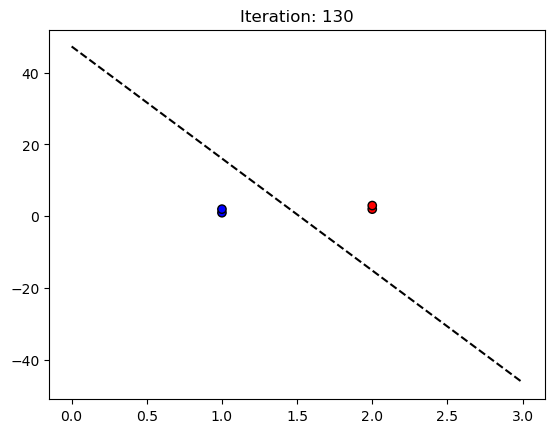

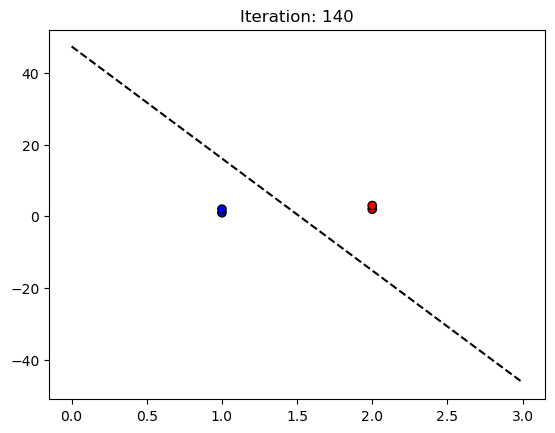

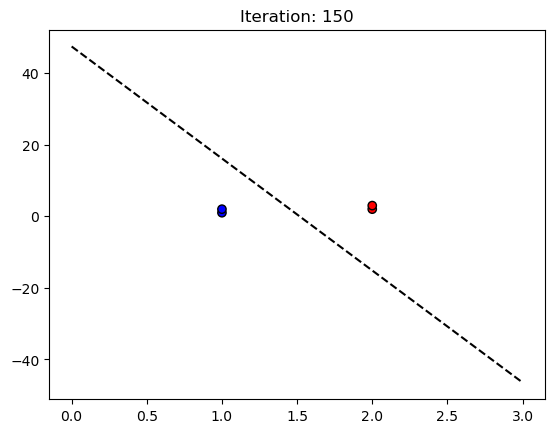

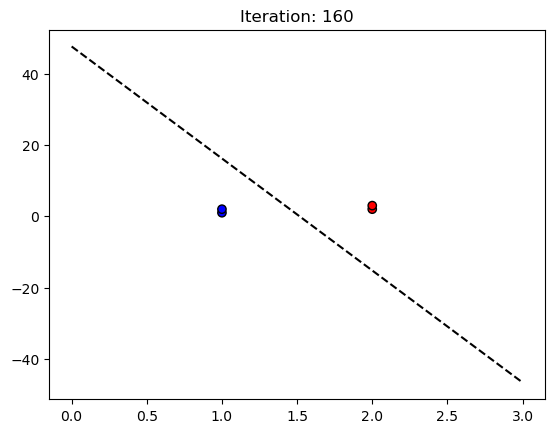

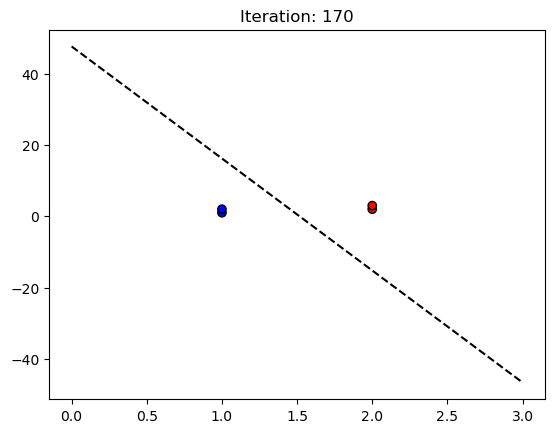

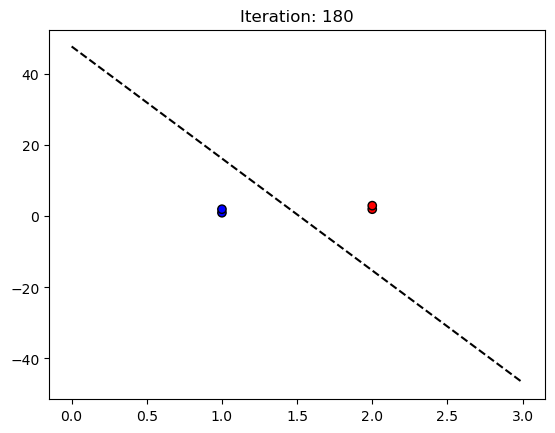

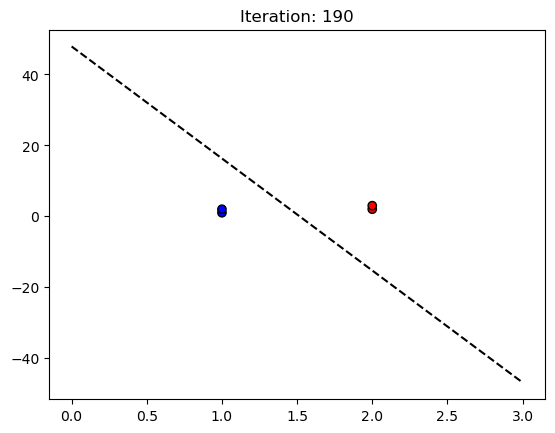

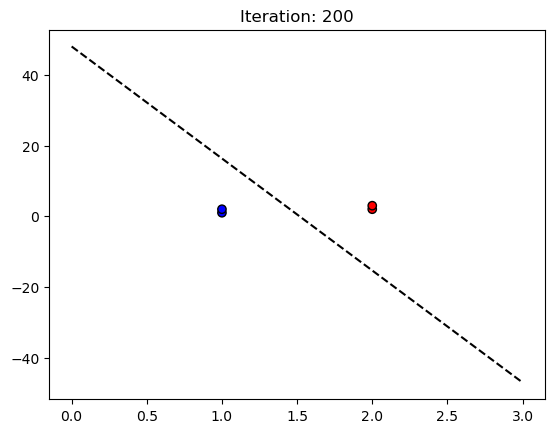

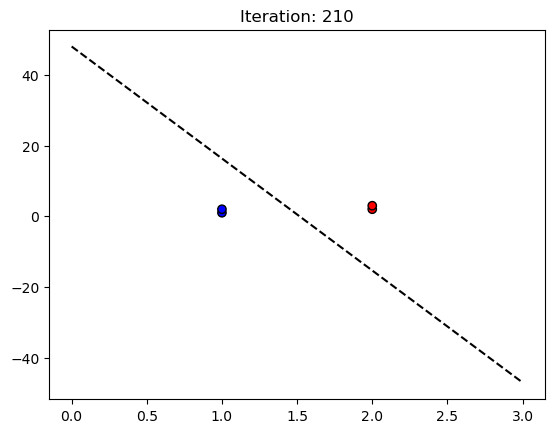

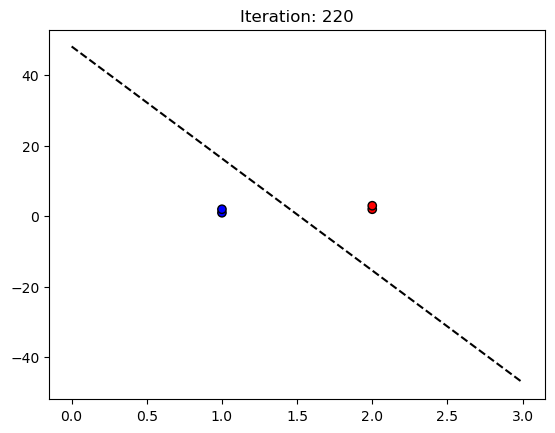

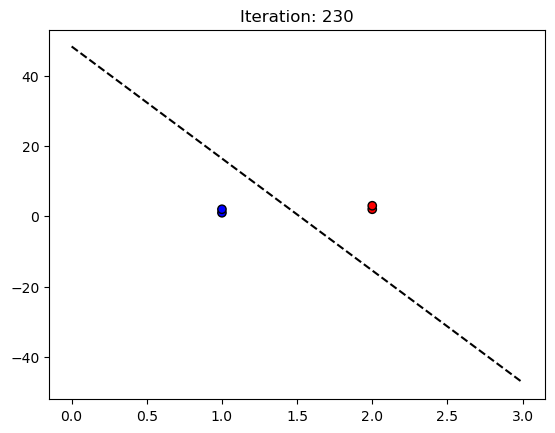

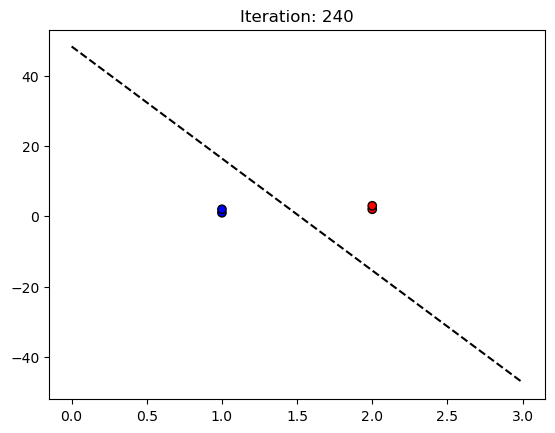

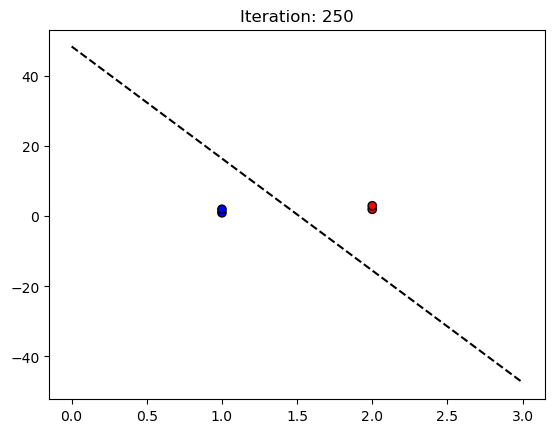

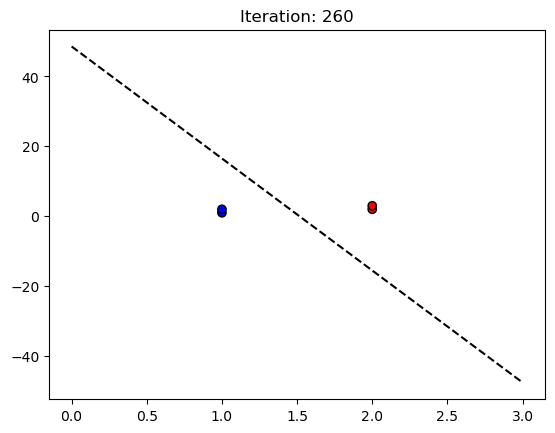

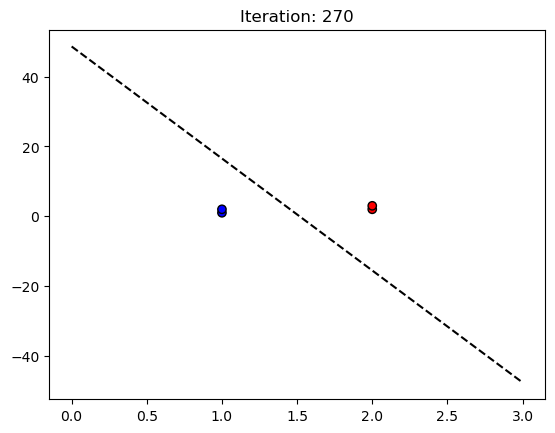

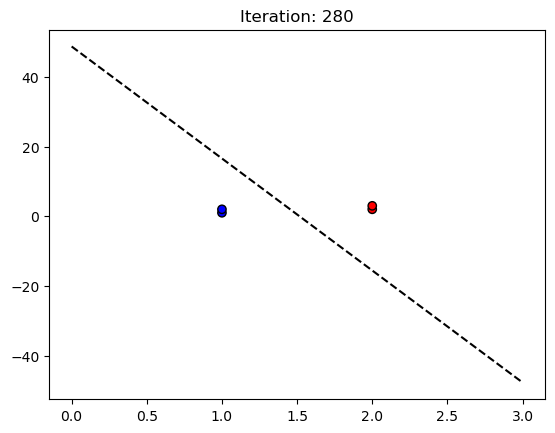

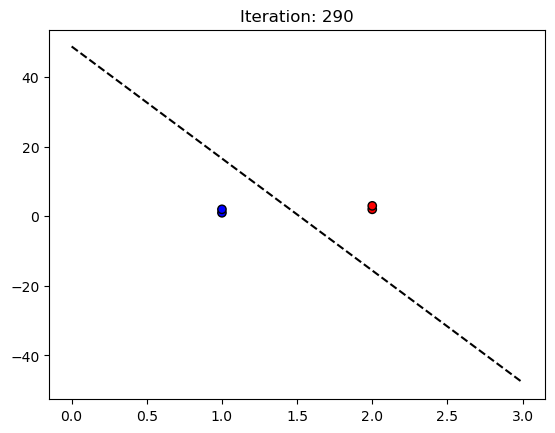

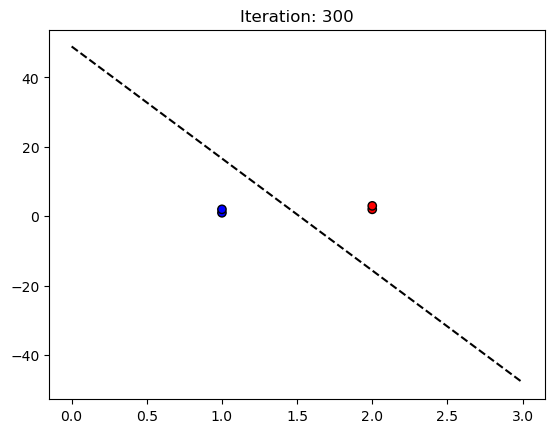

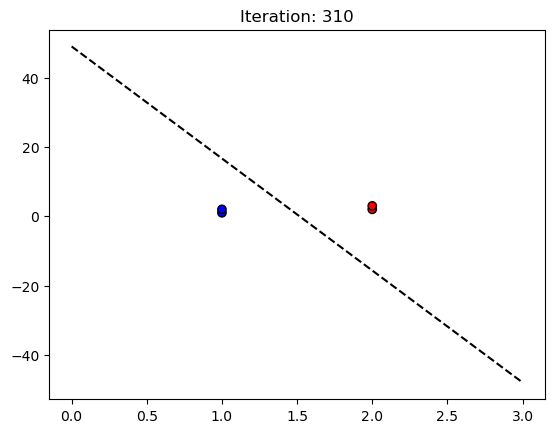

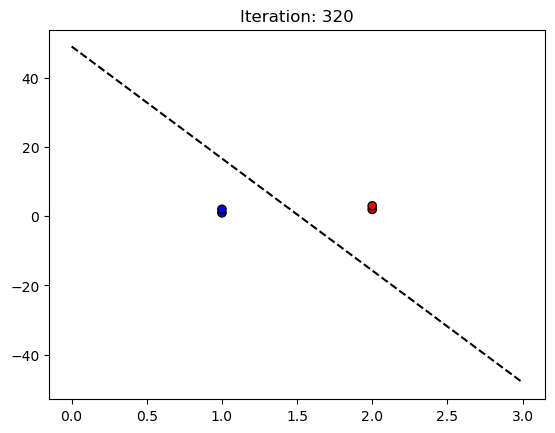

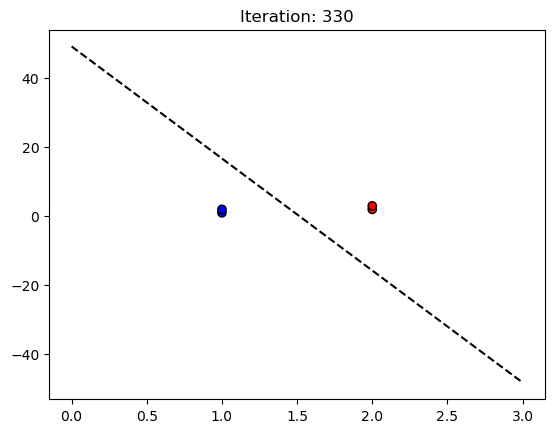

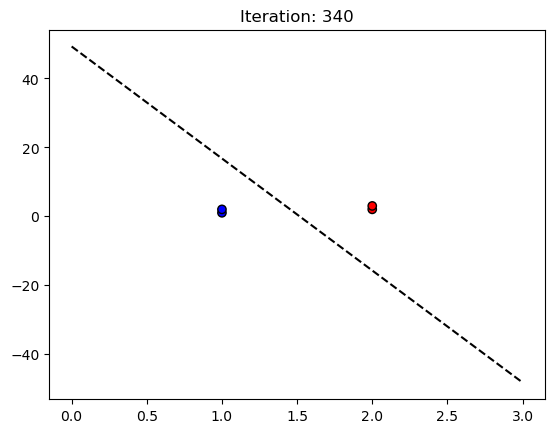

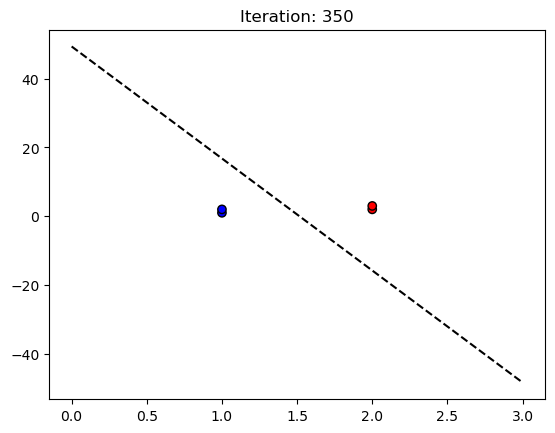

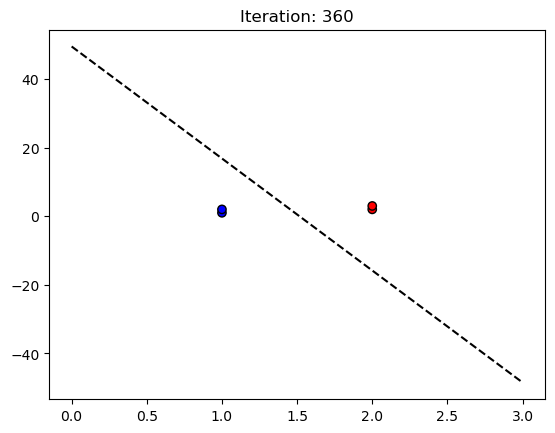

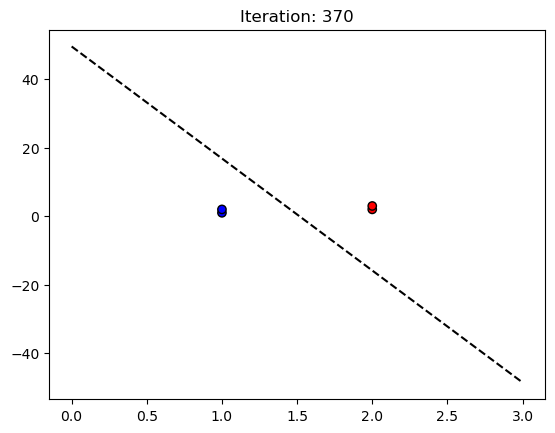

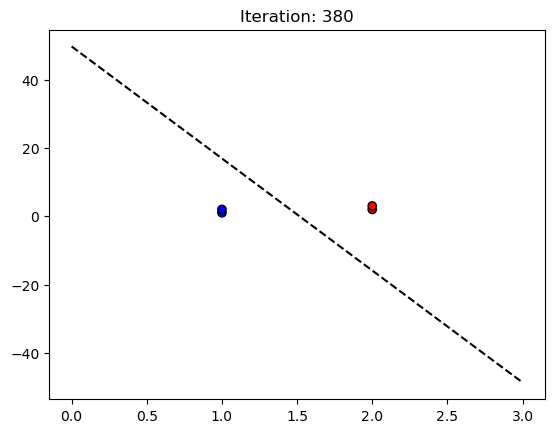

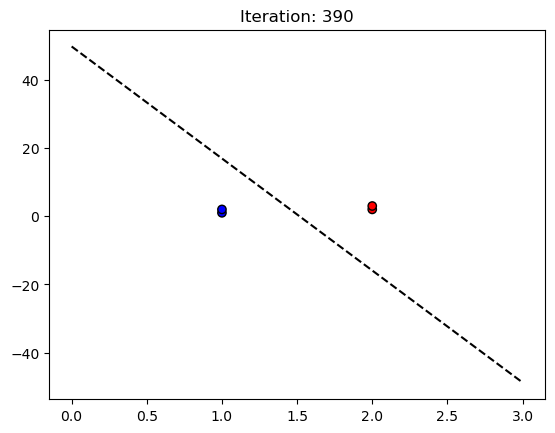

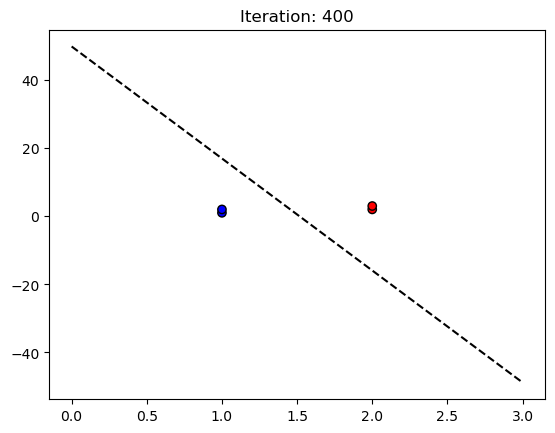

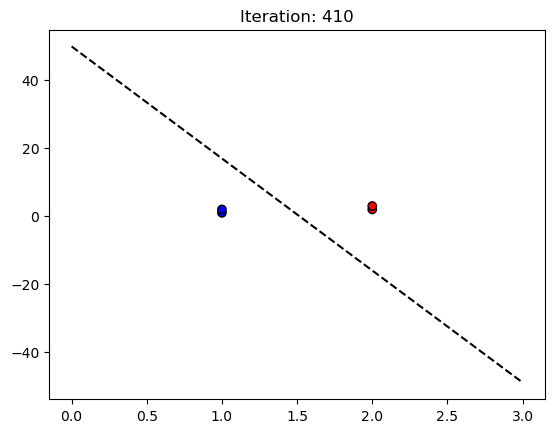

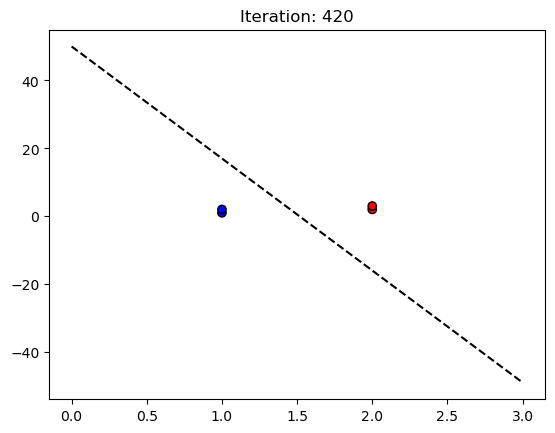

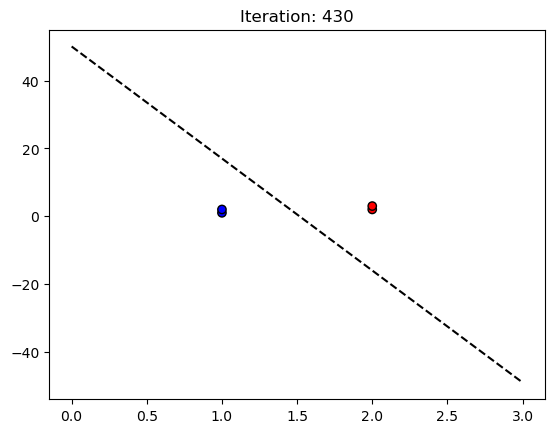

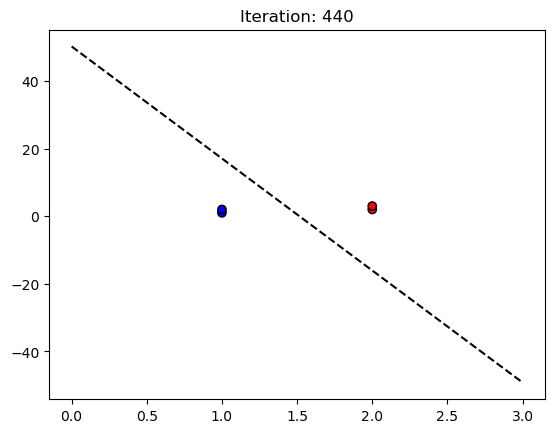

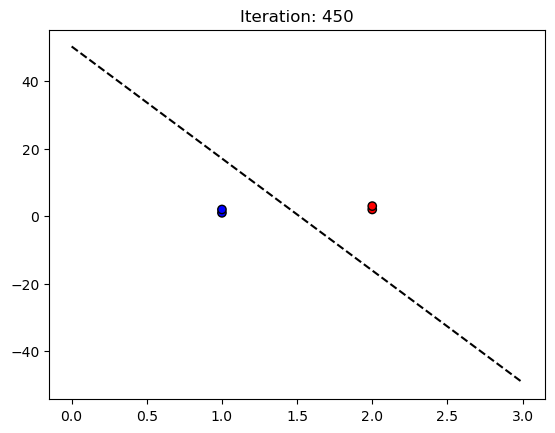

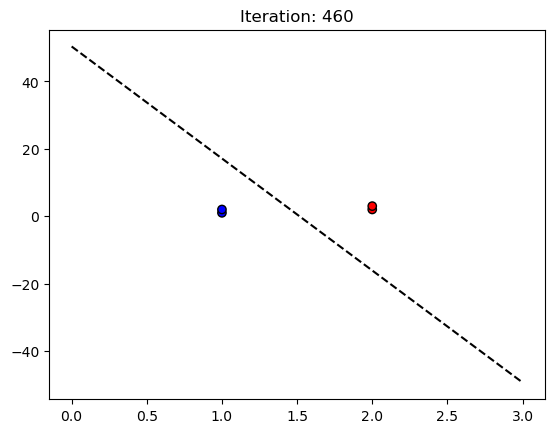

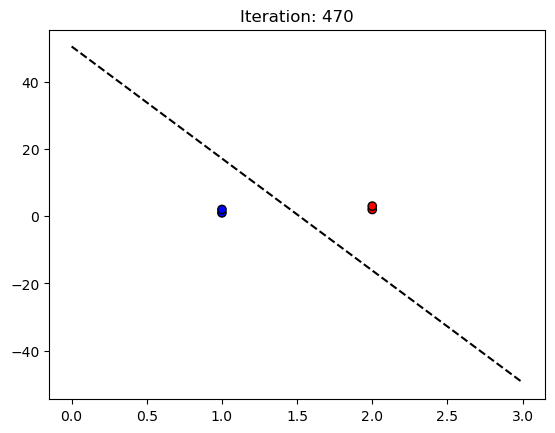

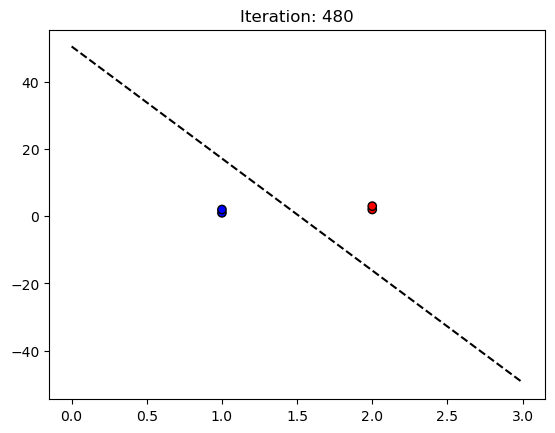

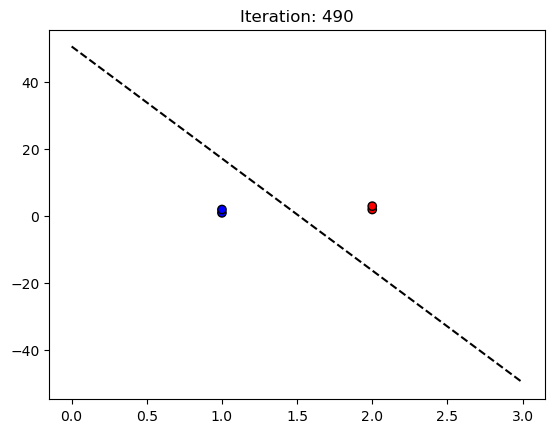

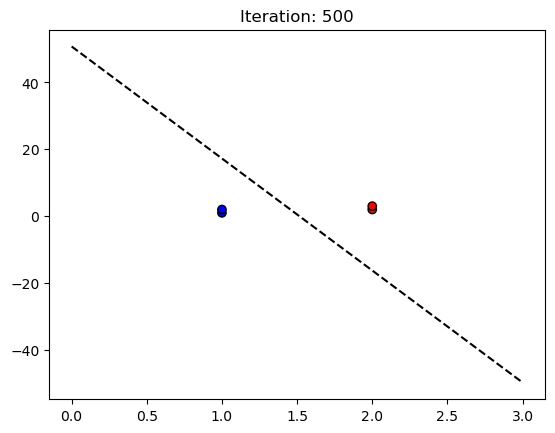

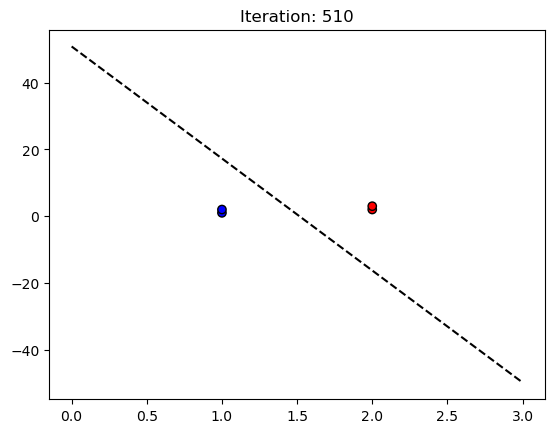

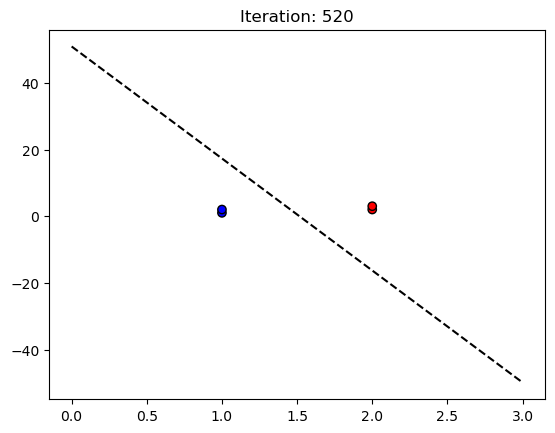

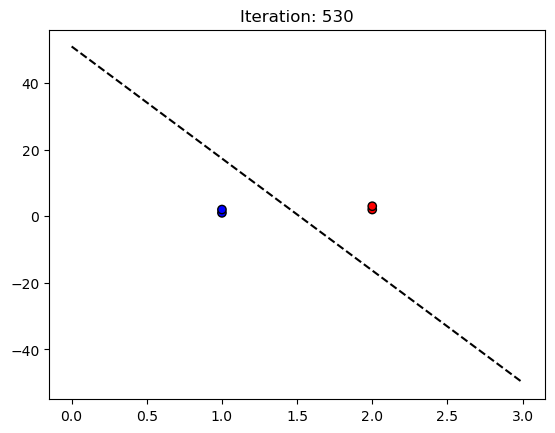

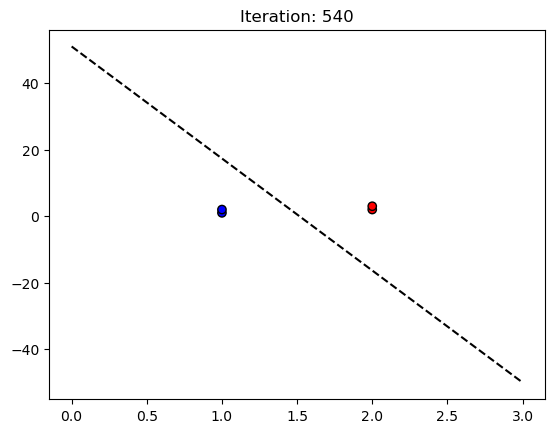

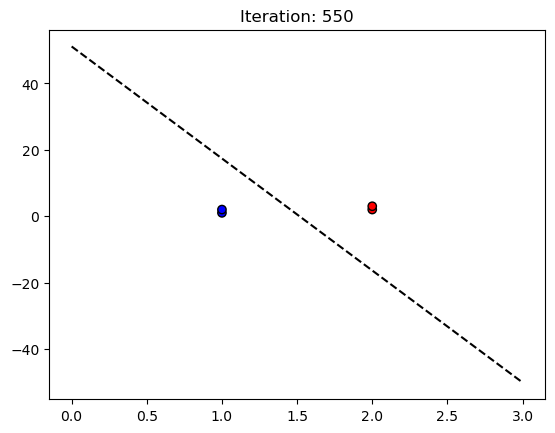

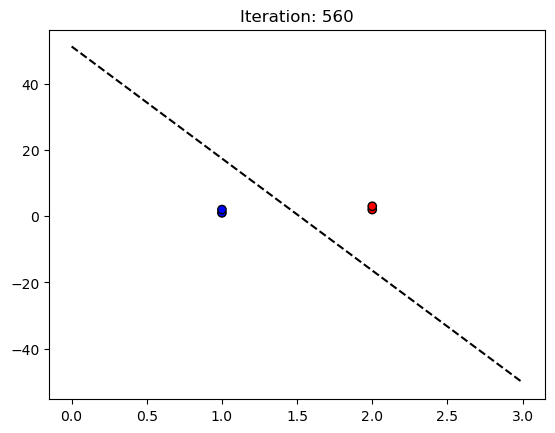

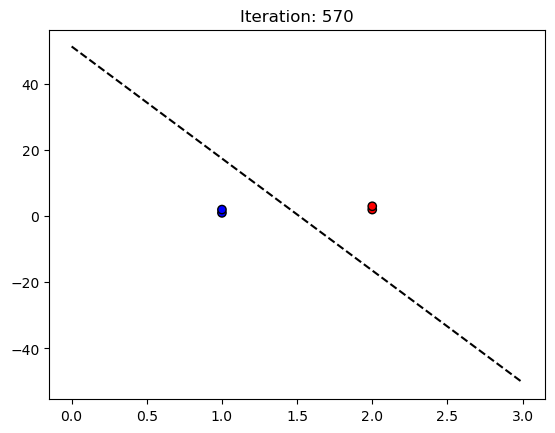

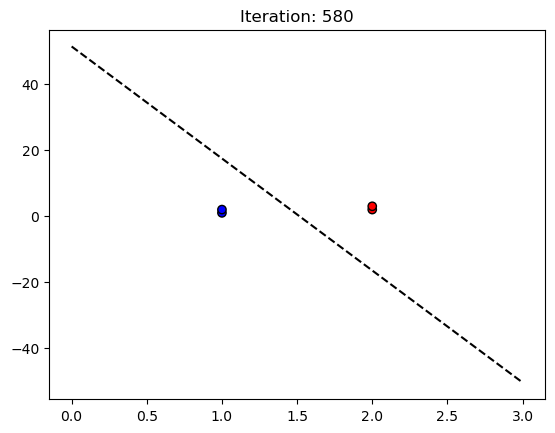

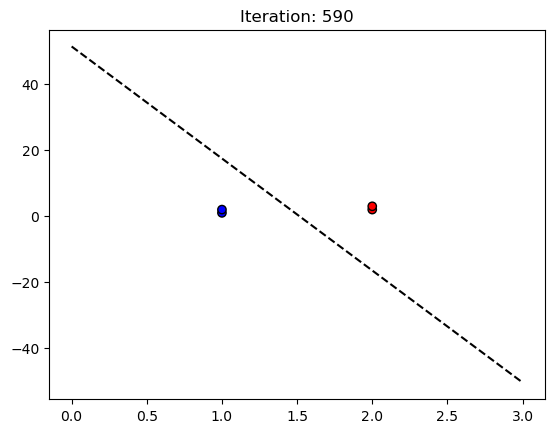

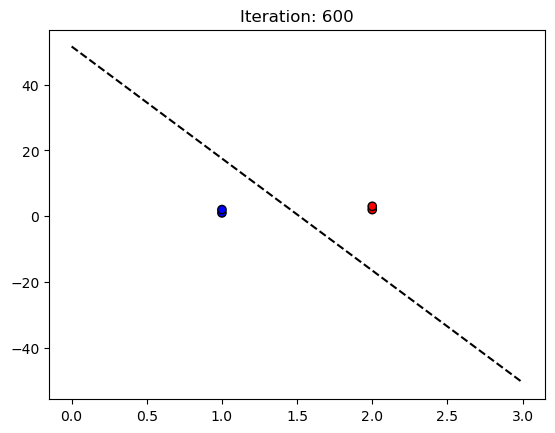

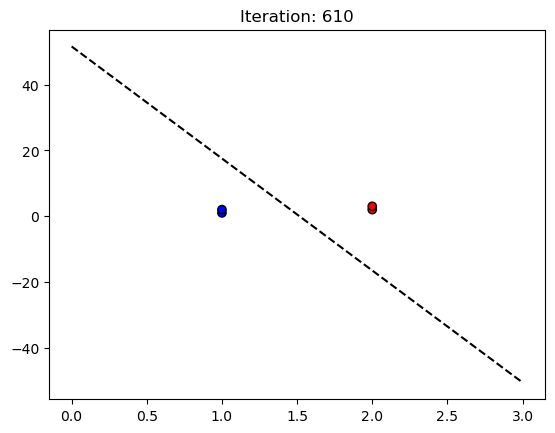

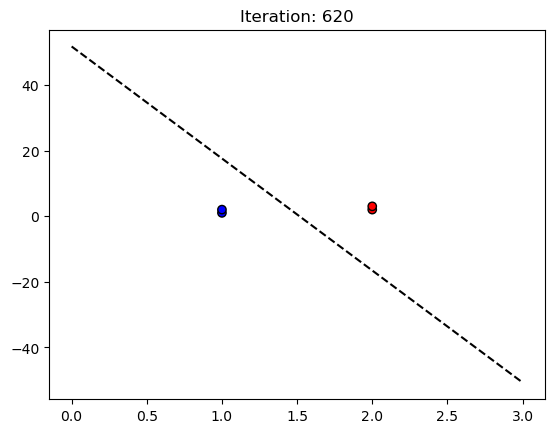

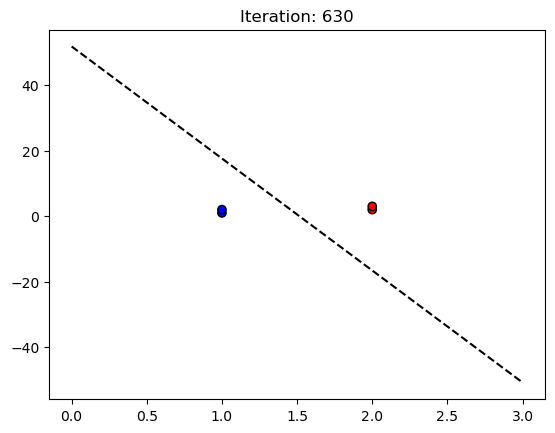

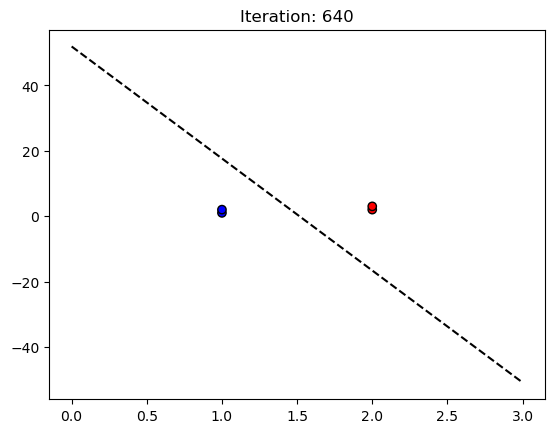

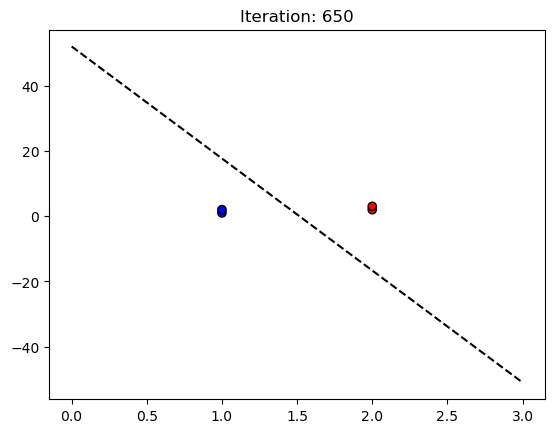

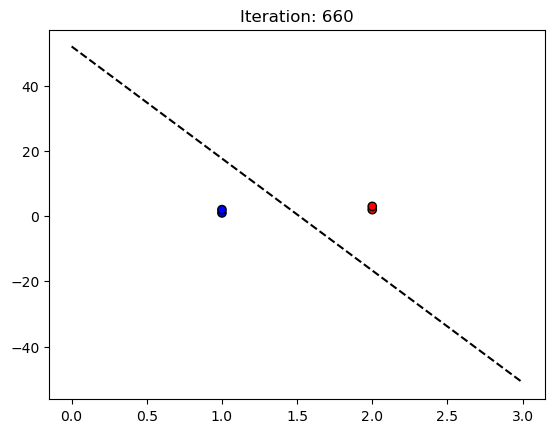

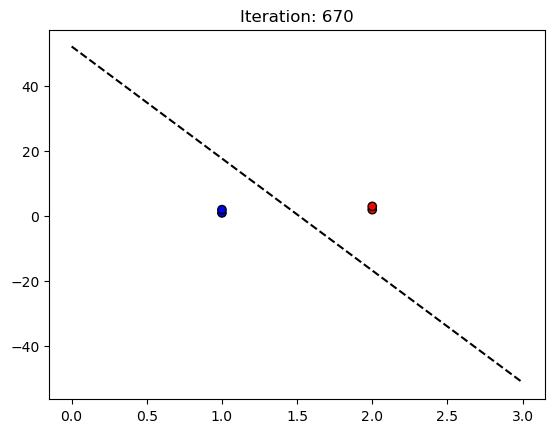

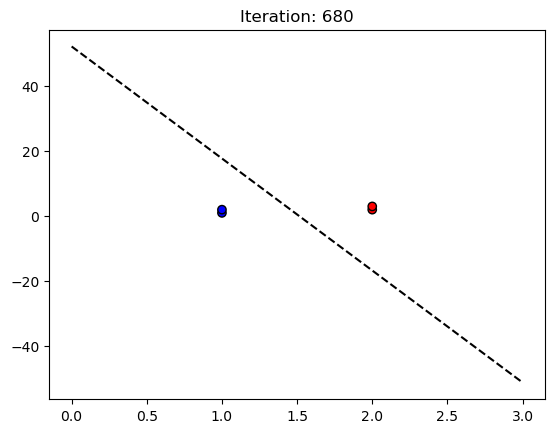

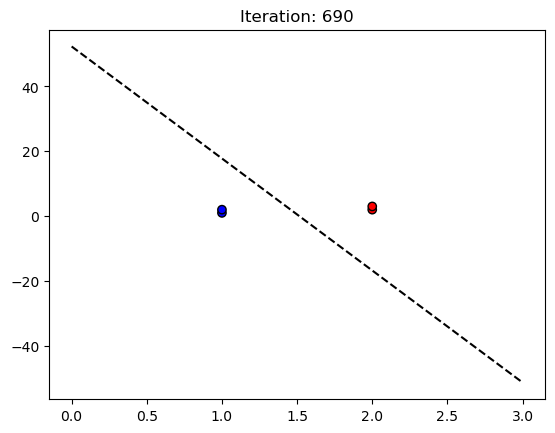

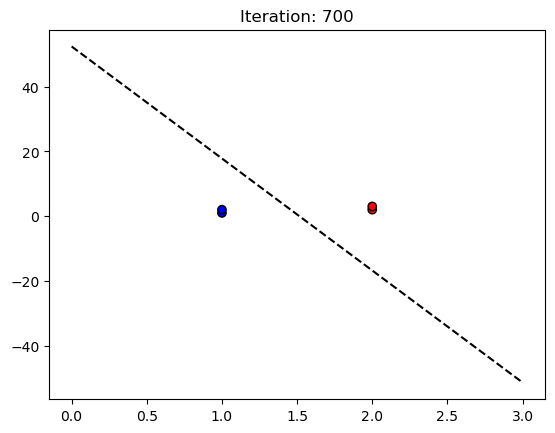

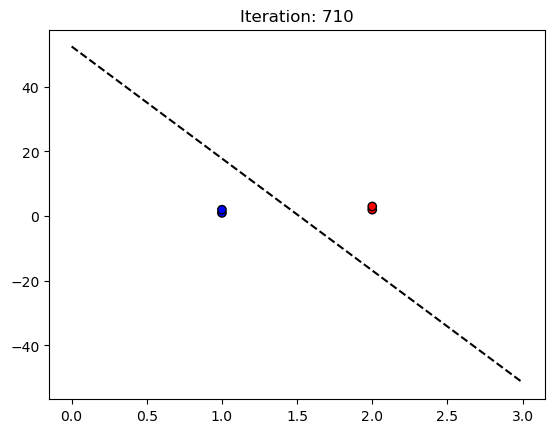

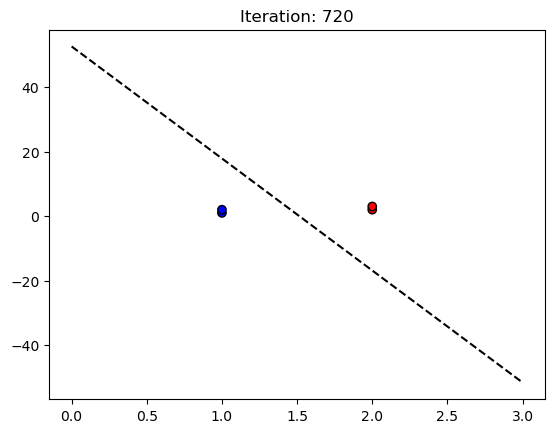

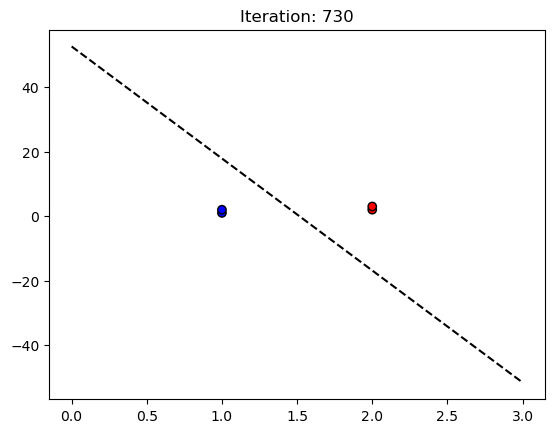

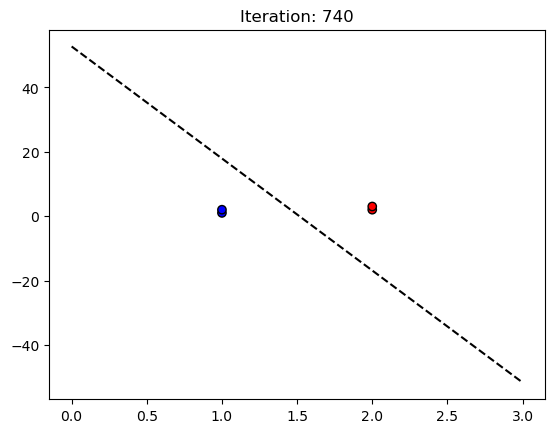

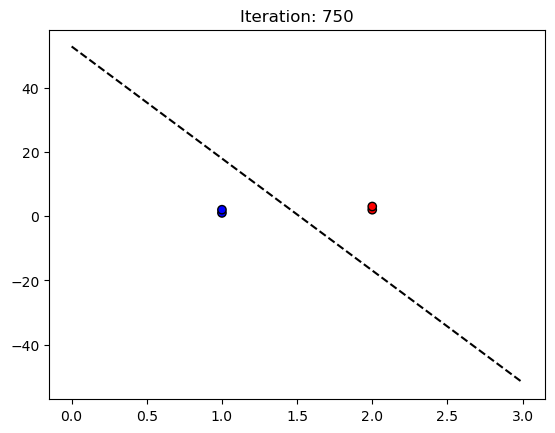

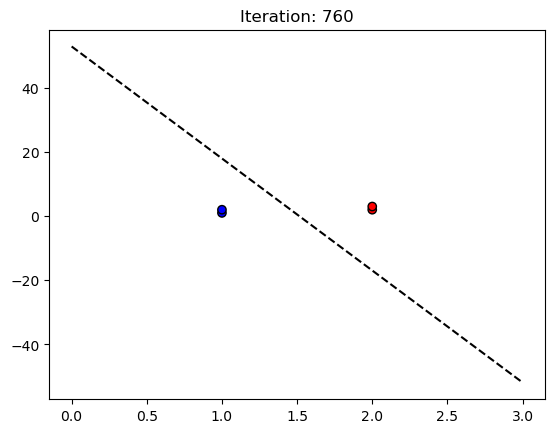

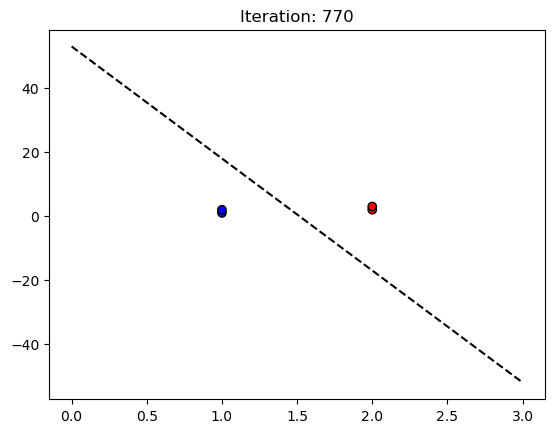

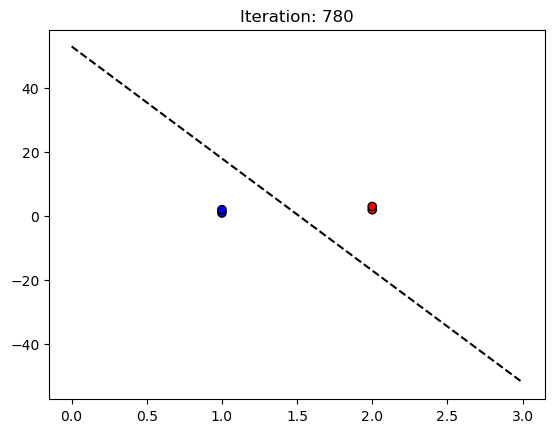

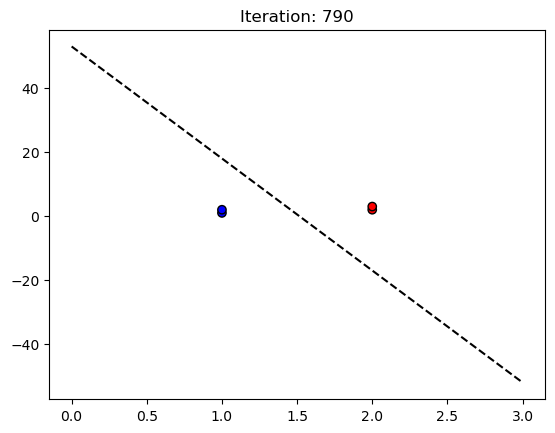

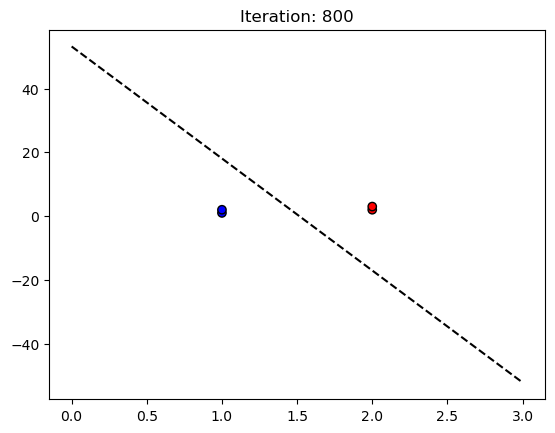

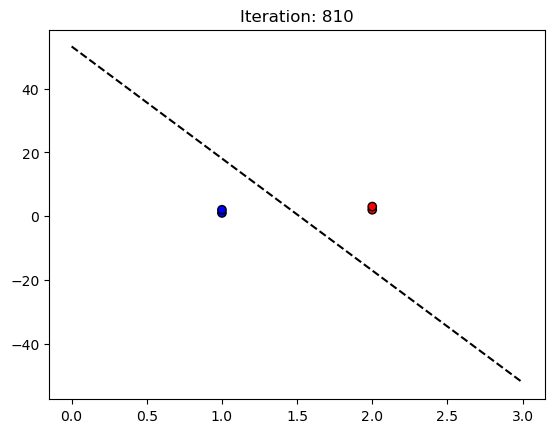

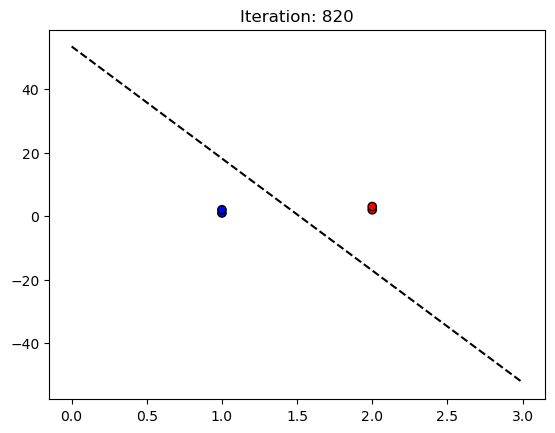

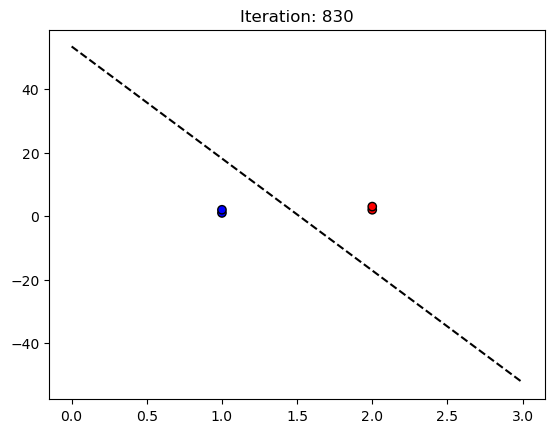

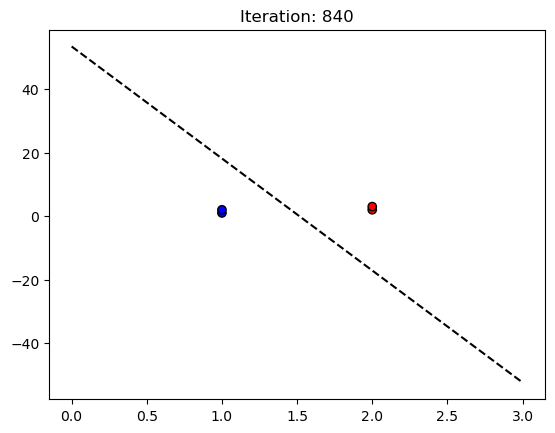

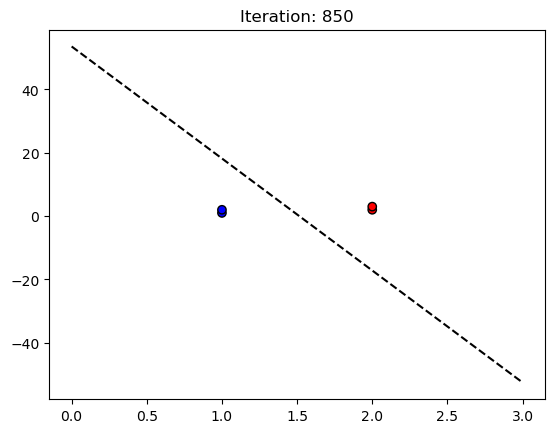

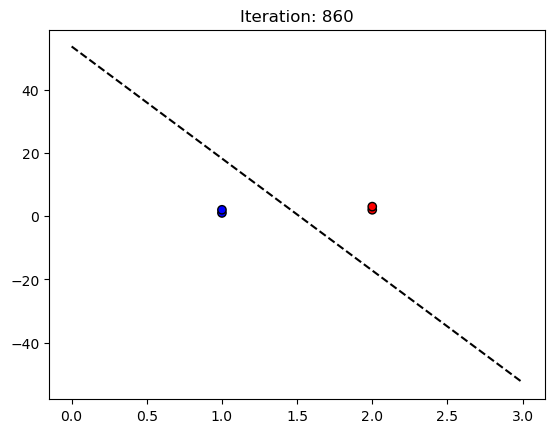

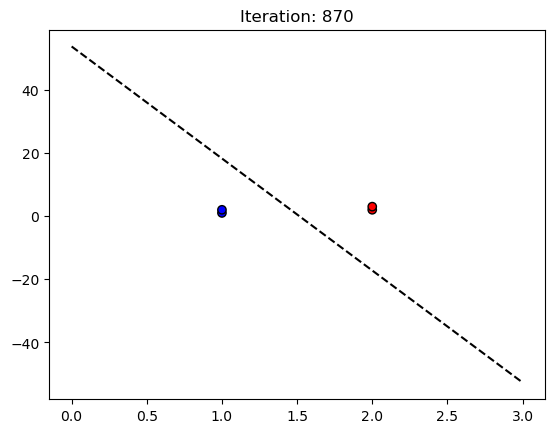

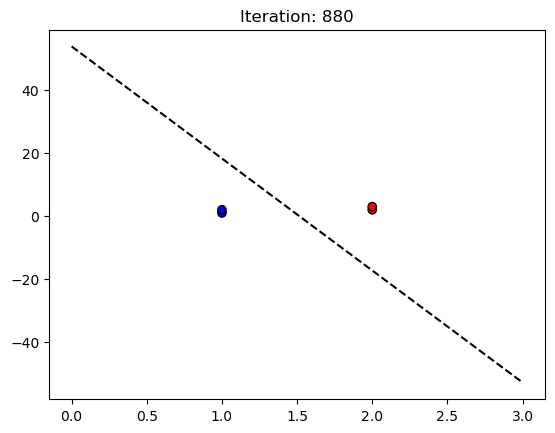

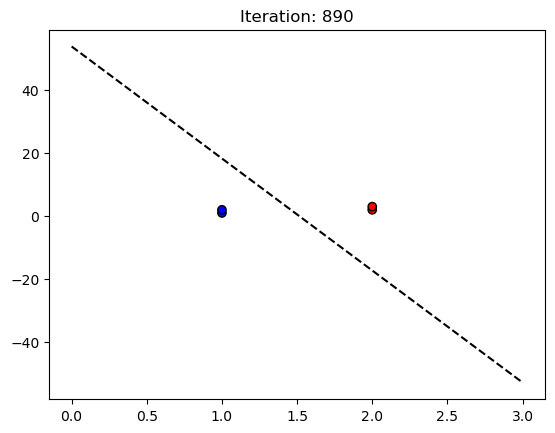

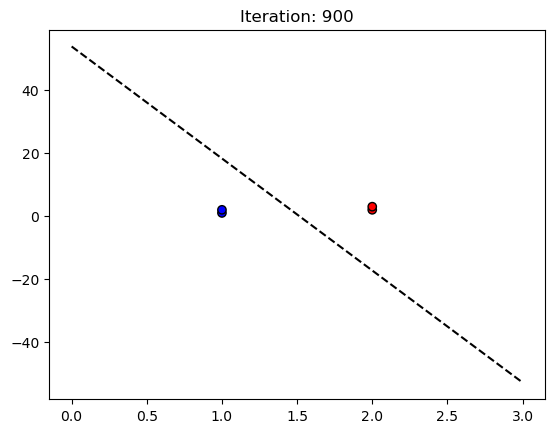

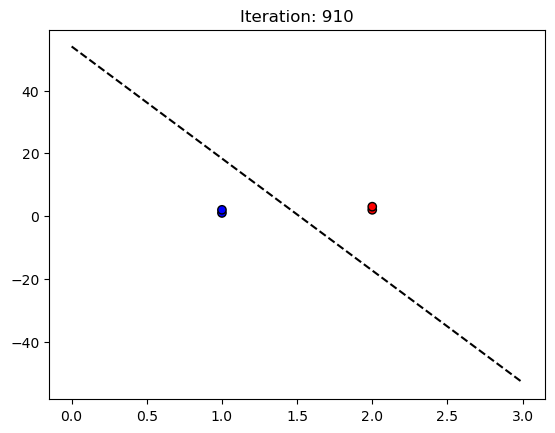

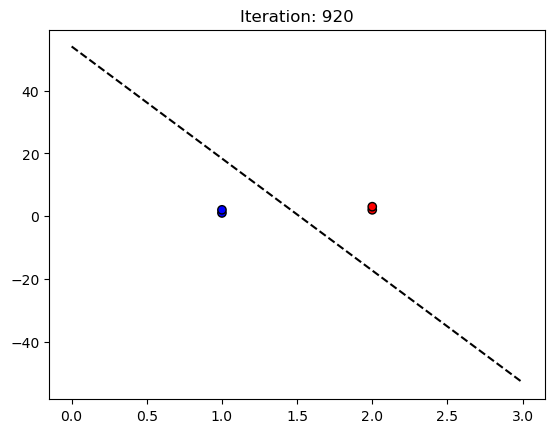

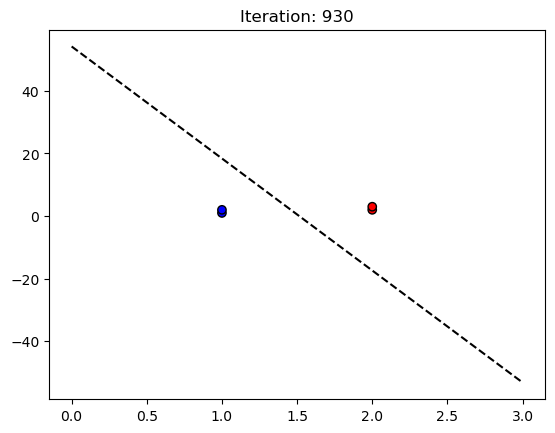

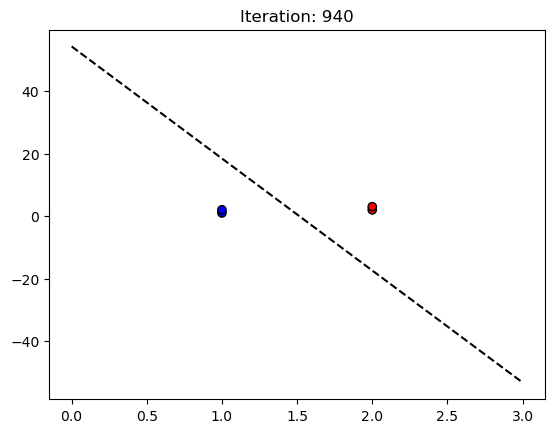

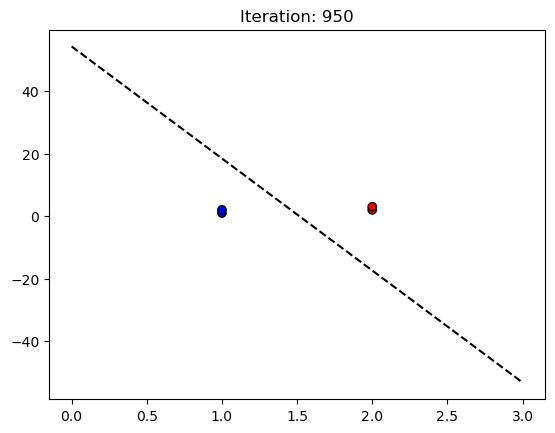

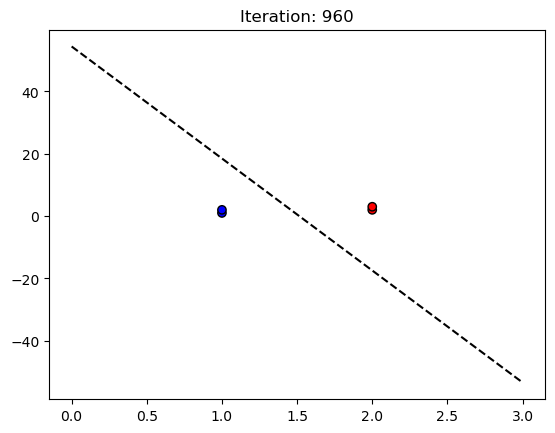

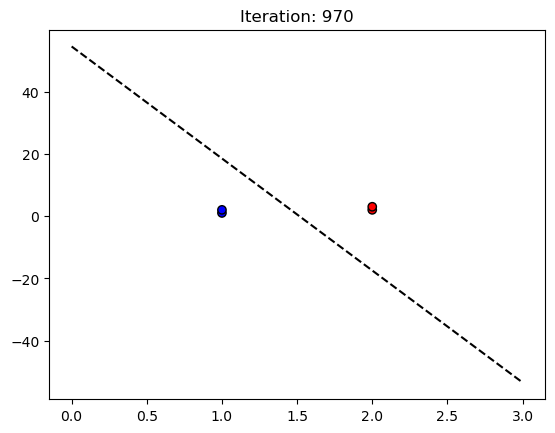

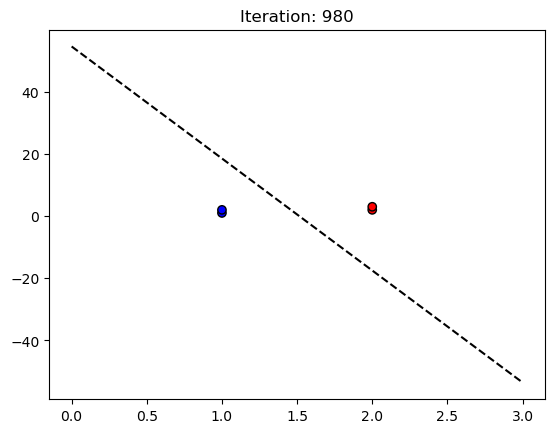

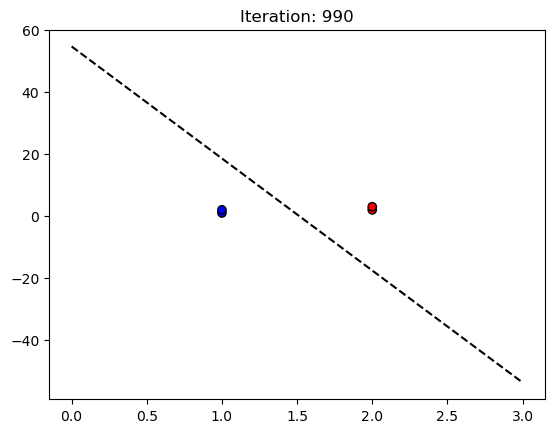

<Figure size 640x480 with 0 Axes>

In [62]:
m = len(y)
x_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)


for i in range(iterations):
    h = sigmoid(X_bias @ theta)
    gradient = (1/m) * X_bias.T @ (h - y)
    theta -= alpha * gradient
    
    if i % 10 == 0:  # 10번마다 한 번씩 그림
        # 결정경계 그리기
        y_vals = -(theta[0] + theta[1] * x_vals) / theta[2]
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
        plt.plot(x_vals, y_vals, 'k--')
        plt.title(f'Iteration: {i}')
        plt.pause(0.1)
        plt.clf()